#Importing the libraries NumPy, Pandas, Sklearn and XGBoost

In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Reading the file data of Parkinson disease

In [2]:
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#Features are columns that are without column status and the label includes status column

In [3]:
features=df.loc[:,df.columns!='status'].values[:,1:]

labels=df.loc[:,'status'].values

print(labels[labels==1].shape[0], labels[labels==0].shape[0])


scaler=MinMaxScaler((-1,1))

x=scaler.fit_transform(features)

y=labels

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)


model=XGBClassifier(eval_metric='mlogloss')

model.fit(x_train,y_train)



147 48


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [4]:
y_pred=model.predict(x_test)

print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [5]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(

    confusion_matrix(y_test, y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)

,Predicted Healthy,Predicted Parkinsons
True Healthy,6,1
True Parkinsons,1,31


#Heatmap of Predicted data by the XGBoost Algorithm

<AxesSubplot:>

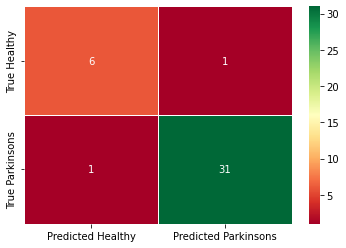

In [7]:
import seaborn as sns
tc=pd.DataFrame(

    confusion_matrix(y_test, y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)
sns.heatmap(tc, cmap ='RdYlGn', linewidths = 1, annot = True)


#K-Nearest Neighbors (KNN ) algorithm

In [8]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)

x_test = pca.transform(x_test)

variance = pca.explained_variance_ratio_

classifi = KNeighborsClassifier(n_neighbors = 8,p=2,metric ='minkowski')

classifi.fit(x_train,y_train)

y_pred = classifi.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score

#KNN model

cm=confusion_matrix(y_test,y_pred)

accuracy_score(y_test,y_pred)

#Analyzing and predicting results



0.8974358974358975

In [9]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(

    confusion_matrix(y_test, y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)

,Predicted Healthy,Predicted Parkinsons
True Healthy,4,3
True Parkinsons,1,31


#Random Forest algorithm

In [10]:
X = df.drop('status', axis=1)


X = X.drop('name', axis=1)

y = df['status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)

In [12]:


from sklearn.metrics import accuracy_score
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)


accuracy_score(y_test, y_predict)

0.9387755102040817

In [13]:
from sklearn.metrics import confusion_matrix


pd.DataFrame(

confusion_matrix(y_test, y_predict),

columns=['Predicted Healthy', 'Predicted Parkinsons'],

index=['True Healthy', 'True Parkinsons']

)

,Predicted Healthy,Predicted Parkinsons
True Healthy,11,1
True Parkinsons,2,35
